# **[Chapter 03]**  
**┗ 반도체 공정 이상 탐지**
---
> **목차(Context)**

* 문제상황 및 데이터 살펴보기
* 문제해결 프로세스 정의
* 🥉Session 1 - 「Data 전처리 및 EDA」
* 🥈Session 2 - 「Feature Selection」
* 🥇Session 3 - 「이상 탐지 모델링」

## **문제상황 및 데이터 살펴보기**
---
> **시나리오** 🏭

A사는 반도체를 생산하는 글로벌 회사이다. 반도체 구성품 중 Wafer는 반도체 집적회로의 핵심 재료이다. A사는 반도체의 성능을 향상시키기 위해서  
최근 Wafer 설계를 변경하고 제품을 생산 중에 있다. 설계 변경으로 인해 최근 불량 제품이 발생하고 있어, 이상 탐지 모델링을 통해 이상인 Wafer를 사전에  
검출하고자 한다.

> **데이터 살펴보기**

* Wafer 공정 Data
* 데이터 명세 ⬇ 

|Column|Description|
|:---|:---|
|feature1~n|Wafer 특성 데이터|
|Class|이상 여부|

## **문제해결 프로세스 정의**
---
> **문제정의**


▶ 최근 설계변경으로 인한 Wafer 불량 발생


> **기대효과**


▶ Wafer 불량 사전 탐지를 통해 반도체 완성 전 사전 처리<br>
▶ 불량 및 폐기 비용 감소<br>


> **해결방안**


▶ 이상 탐지 모델링을 통해 반도체 완성품 조립 전 Wafer 불량 뱔견<br>
▶ Session 1 🥉<br>
 - Data 전처리 및 EDA<br>
▶ Session 2 🥈<br>
 - Feature Selection<br>
▶ Session 3 🥇<br>
 - 이상 탐지 모델링<br>


> **성과측정**  


▶ 모델 활용 전/후 Wafer 불량률 비교


> **현업적용**  


▶ Wafer 공정 데이터 수집 체계 구축<br>
▶ 공정 데이터 Model Input<br>
▶ 이상 Wafer 추출 및 점검<br>


> **주요 코드 미리 살펴보기**  


▶ Session 1 → .isna(), .dropna(), .isnull().sum().sum(), .loc, value_counts()<br>
▶ Session 2 → StandardScaler().fit_transform(X), np.digitize(df_s[col], bins)<br>
▶ Session 3 → .iloc, pca.explained_variance_ratio_, np.cumsum, .dist_<br>


## **🥉Session 1**  
**┗ Data 전처리 및 EDA**  
---

In [37]:
# ▶ pd.set option
import pandas as pd 
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)  

# ▶ Data read
df_train = pd.read_csv("chapter03_df_train.csv")
df_test = pd.read_csv("chapter03_df_test.csv")

df = pd.concat([df_train, df_test], axis=0)
df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,...,feature_1510,feature_1511,feature_1512,feature_1513,feature_1514,feature_1515,feature_1516,feature_1517,feature_1518,feature_1519,feature_1520,feature_1521,feature_1522,feature_1523,feature_1524,feature_1525,feature_1526,feature_1527,feature_1528,feature_1529,feature_1530,feature_1531,feature_1532,feature_1533,feature_1534,feature_1535,feature_1536,feature_1537,feature_1538,feature_1539,feature_1540,feature_1541,feature_1542,feature_1543,feature_1544,feature_1545,feature_1546,feature_1547,feature_1548,feature_1549,feature_1550,feature_1551,feature_1552,feature_1553,feature_1554,feature_1555,feature_1556,feature_1557,feature_1558,Class
0,100.0,160.0,1.6000,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
1,20.0,83.0,4.1500,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.0
2,99.0,150.0,1.5151,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
3,40.0,40.0,1.0000,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
4,12.0,234.0,19.5000,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0


In [2]:
# ▶ Data 형태 확인
# ▶ 2519 row, 1559 col로 구성됨
print('df :', df.shape)

df : (2519, 1559)


In [3]:
# ▶ Data type 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2519 entries, 0 to 755
Columns: 1559 entries, feature_1 to Class
dtypes: float64(5), int64(1554)
memory usage: 30.0 MB


In [4]:
df['Class'].dtypes

dtype('float64')

In [5]:
# ▶ Null 값 확인
print(df.isnull().sum())

feature_1         0
feature_2         0
feature_3         0
feature_4         0
feature_5         0
feature_6         0
feature_7         0
feature_8         0
feature_9         0
feature_10        0
feature_11        0
feature_12        0
feature_13        0
feature_14        0
feature_15        0
feature_16        0
feature_17        0
feature_18        0
feature_19        0
feature_20        0
feature_21        0
feature_22        0
feature_23        0
feature_24        0
feature_25        0
feature_26        0
feature_27        0
feature_28        0
feature_29        0
feature_30        0
feature_31        0
feature_32        0
feature_33        0
feature_34        0
feature_35        0
feature_36        0
feature_37        0
feature_38        0
feature_39        0
feature_40        0
feature_41        0
feature_42        0
feature_43        0
feature_44        0
feature_45        0
feature_46        0
feature_47        0
feature_48        0
feature_49        0
feature_50        0


In [6]:
# ▶ Class가 NaN인 데이터 존재
df[df['Class'].isna()].head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,...,feature_1510,feature_1511,feature_1512,feature_1513,feature_1514,feature_1515,feature_1516,feature_1517,feature_1518,feature_1519,feature_1520,feature_1521,feature_1522,feature_1523,feature_1524,feature_1525,feature_1526,feature_1527,feature_1528,feature_1529,feature_1530,feature_1531,feature_1532,feature_1533,feature_1534,feature_1535,feature_1536,feature_1537,feature_1538,feature_1539,feature_1540,feature_1541,feature_1542,feature_1543,feature_1544,feature_1545,feature_1546,feature_1547,feature_1548,feature_1549,feature_1550,feature_1551,feature_1552,feature_1553,feature_1554,feature_1555,feature_1556,feature_1557,feature_1558,Class
0,60.0,468.0,7.8000,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
1,108.0,179.0,1.6574,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
2,1.0,1.0,2.0000,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
3,60.0,468.0,7.8000,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
4,60.0,120.0,2.0000,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN


In [7]:
# ▶ NaN 데이터 삭제
df = df.dropna()
print(df.isnull().sum().sum())

0


In [8]:
# ▶ Outlier 확인
df.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,...,feature_1510,feature_1511,feature_1512,feature_1513,feature_1514,feature_1515,feature_1516,feature_1517,feature_1518,feature_1519,feature_1520,feature_1521,feature_1522,feature_1523,feature_1524,feature_1525,feature_1526,feature_1527,feature_1528,feature_1529,feature_1530,feature_1531,feature_1532,feature_1533,feature_1534,feature_1535,feature_1536,feature_1537,feature_1538,feature_1539,feature_1540,feature_1541,feature_1542,feature_1543,feature_1544,feature_1545,feature_1546,feature_1547,feature_1548,feature_1549,feature_1550,feature_1551,feature_1552,feature_1553,feature_1554,feature_1555,feature_1556,feature_1557,feature_1558,Class
count,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,...,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000
mean,53.094158,126.587067,3.423940,0.724334,0.002836,0.002836,0.007941,0.002269,0.004538,0.012479,0.002269,0.006239,0.006239,0.004538,0.006239,0.004538,0.002836,0.003971,0.006239,0.004538,0.002269,0.006239,0.005672,0.002836,0.003971,0.003971,0.003971,0.003403,0.002269,0.005672,0.003971,0.005672,0.009643,0.008508,0.019853,0.005672,0.003971,0.005105,0.004538,0.006239,0.003971,0.002836,0.005672,0.006807,0.003403,0.000567,0.003403,0.013046,0.001134,0.004538,...,0.007374,0.005105,0.004538,0.005105,0.019853,0.006807,0.005105,0.004538,0.004538,0.024390,0.006807,0.007374,0.003971,0.021554,0.007374,0.007374,0.007941,0.014748,0.012479,0.001134,0.020420,0.005672,0.006807,0.031764,0.013613,0.003403,0.006239,0.006239,0.020420,0.006239,0.009075,0.002269,0.014748,0.013046,0.003403,0.005672,0.002269,0.006239,0.010210,0.005105,0.003971,0.005672,0.002836,0.003971,0.003971,0.015315,0.014748,0.009643,0.001134,0.081112
std,55.842014,129.859641,4.566858,0.446976,0.053194,0.053194,0.088783,0.047592,0.067229,0.111041,0.047592,0.078765,0.078765,0.067229,0.078765,0.067229,0.053194,0.062905,0.078765,0.067229,0.047592,0.078765,0.075121,0.053194,0.062905,0.062905,0.062905,0.058255,0.047592,0.075121,0.062905,0.075121,0.097750,0.091873,0.139533,0.075121,0.062905,0.071286,0.067229,0.078765,0.062905,0.053194,0.075121,0.082244,0.058255,0.023816,0.058255,0.113504,0.033672,0.067229,...,0.085578,0.071286,0.067229,0.071286,0.139533,0.082244,0.071286,0.067229,0.067229,0.154301,0.082244,0.085578,0.062905,0.145264,0.085578,0.085578,0.088783,0.120575,0.111041,0.033672,0.141471,0.075121,0.082244,0.175421,0.115911,0.0

In [9]:
# ▶ 변수가 많기 때문에, Dataframe 변경을 통한 min 값 음수 확인
pd.DataFrame(df.describe())

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,...,feature_1510,feature_1511,feature_1512,feature_1513,feature_1514,feature_1515,feature_1516,feature_1517,feature_1518,feature_1519,feature_1520,feature_1521,feature_1522,feature_1523,feature_1524,feature_1525,feature_1526,feature_1527,feature_1528,feature_1529,feature_1530,feature_1531,feature_1532,feature_1533,feature_1534,feature_1535,feature_1536,feature_1537,feature_1538,feature_1539,feature_1540,feature_1541,feature_1542,feature_1543,feature_1544,feature_1545,feature_1546,feature_1547,feature_1548,feature_1549,feature_1550,feature_1551,feature_1552,feature_1553,feature_1554,feature_1555,feature_1556,feature_1557,feature_1558,Class
count,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,...,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000
mean,53.094158,126.587067,3.423940,0.724334,0.002836,0.002836,0.007941,0.002269,0.004538,0.012479,0.002269,0.006239,0.006239,0.004538,0.006239,0.004538,0.002836,0.003971,0.006239,0.004538,0.002269,0.006239,0.005672,0.002836,0.003971,0.003971,0.003971,0.003403,0.002269,0.005672,0.003971,0.005672,0.009643,0.008508,0.019853,0.005672,0.003971,0.005105,0.004538,0.006239,0.003971,0.002836,0.005672,0.006807,0.003403,0.000567,0.003403,0.013046,0.001134,0.004538,...,0.007374,0.005105,0.004538,0.005105,0.019853,0.006807,0.005105,0.004538,0.004538,0.024390,0.006807,0.007374,0.003971,0.021554,0.007374,0.007374,0.007941,0.014748,0.012479,0.001134,0.020420,0.005672,0.006807,0.031764,0.013613,0.003403,0.006239,0.006239,0.020420,0.006239,0.009075,0.002269,0.014748,0.013046,0.003403,0.005672,0.002269,0.006239,0.010210,0.005105,0.003971,0.005672,0.002836,0.003971,0.003971,0.015315,0.014748,0.009643,0.001134,0.081112
std,55.842014,129.859641,4.566858,0.446976,0.053194,0.053194,0.088783,0.047592,0.067229,0.111041,0.047592,0.078765,0.078765,0.067229,0.078765,0.067229,0.053194,0.062905,0.078765,0.067229,0.047592,0.078765,0.075121,0.053194,0.062905,0.062905,0.062905,0.058255,0.047592,0.075121,0.062905,0.075121,0.097750,0.091873,0.139533,0.075121,0.062905,0.071286,0.067229,0.078765,0.062905,0.053194,0.075121,0.082244,0.058255,0.023816,0.058255,0.113504,0.033672,0.067229,...,0.085578,0.071286,0.067229,0.071286,0.139533,0.082244,0.071286,0.067229,0.067229,0.154301,0.082244,0.085578,0.062905,0.145264,0.085578,0.085578,0.088783,0.120575,0.111041,0.033672,0.141471,0.075121,0.082244,0.175421,0.115911,0.0

In [11]:
# ▶ min 값 음수(-) 값 확인
df_min = pd.DataFrame(df.describe()).loc['min']<0
# ▶ 음수(-) 값 없음 확인
pd.Series(df_min).value_counts()

min
False    1559
Name: count, dtype: int64

### · Data EDA
---
* 데이터 특성 파악을 위한 초기 탐색

In [13]:
# ▶ Class data 확인, 9% 불량률
df['Class'].value_counts()

Class
0.0    1620
1.0     143
Name: count, dtype: int64

In [17]:
from sklearn.preprocessing import StandardScaler

X= df.drop(['Class'], axis=1)
Y= df['Class']

# ▶ 정규화
X_ = StandardScaler().fit_transform(X)

# ▶ DataFrame을 변환
df_s = pd.concat([pd.DataFrame(X_, columns=X.columns), pd.DataFrame(Y, columns=['Class'])], axis=1)

# ▶ Normal vs Abnormal 측정값 평균 비교, 현재 가진 데이터로 분류가 가능한지 가늠
df_s_normal = df_s[df_s['Class']==0]
df_s_abnormal = df_s[df_s['Class']==1]

df_s_normal_mean = pd.DataFrame(df_s_normal.describe()).loc['mean']
df_s_abnormal_mean = pd.DataFrame(df_s_abnormal.describe()).loc['mean']

In [21]:
# ▶ Normal vs Abnormal 측정값 평균 비교, 현재 가진 데이터로 분류가 가능한지 가늠
df_concat = pd.concat([df_s_normal_mean, df_s_abnormal_mean], axis=1, keys=['normal', 'abnormal'])
df_concat['gap'] = abs(df_concat['normal'] - df_concat['abnormal'])
df_top10 = df_concat.sort_values(by = ['gap'], ascending = False).head(10)
df_top10.head()

,normal,abnormal,gap
feature_1400,-0.126258,1.430335,1.556593
feature_1244,-0.118146,1.338440,1.456586
feature_1154,-0.109412,1.239495,1.348908
feature_1048,-0.108304,1.226937,1.335241
feature_1144,-0.108278,1.226650,1.334928


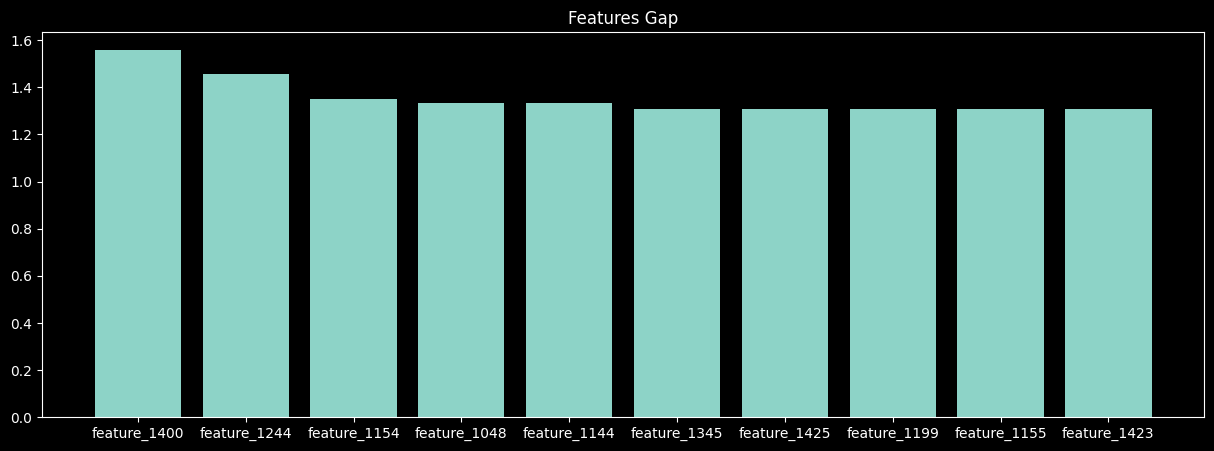

In [24]:
# ▶ Plot
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use(['dark_background'])

fig = plt.figure(figsize=(15,5));
plt.title('Features Gap');
# plt.barh(df_top10.index, df_top10['gap']);
plt.bar(df_top10.index, df_top10['gap']);

### · 연속형 변수 구간화(범주화)
#### Feature Selection
---

In [25]:
# ▶ binning을 하기 위한 준비
df_s_des = pd.DataFrame(df_s.describe())
df_s_des

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,...,feature_1510,feature_1511,feature_1512,feature_1513,feature_1514,feature_1515,feature_1516,feature_1517,feature_1518,feature_1519,feature_1520,feature_1521,feature_1522,feature_1523,feature_1524,feature_1525,feature_1526,feature_1527,feature_1528,feature_1529,feature_1530,feature_1531,feature_1532,feature_1533,feature_1534,feature_1535,feature_1536,feature_1537,feature_1538,feature_1539,feature_1540,feature_1541,feature_1542,feature_1543,feature_1544,feature_1545,feature_1546,feature_1547,feature_1548,feature_1549,feature_1550,feature_1551,feature_1552,feature_1553,feature_1554,feature_1555,feature_1556,feature_1557,feature_1558,Class
count,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1763.000000,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1763.000000,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,...,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1763.000000,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1763.000000,1.763000e+03,1763.000000,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1763.000000
mean,4.735608e-17,-5.037881e-18,8.060610e-18,-1.410607e-17,1.209091e-17,2.015152e-17,0.000000,2.821213e-17,-1.007576e-17,-1.007576e-17,3.224244e-17,6.045457e-18,1.410607e-17,2.015152e-17,6.045457e-18,-1.007576e-17,6.045457e-18,-2.418183e-17,0.000000,-1.007576e-17,1.813637e-17,1.007576e-17,9.068186e-18,-5.037881e-18,-2.619698e-17,-3.627274e-17,-3.022729e-17,1.309849e-17,2.821213e-17,5.037881e-18,-3.627274e-17,2.821213e-17,3.224244e-17,2.619698e-17,-4.030305e-17,6.045457e-18,-2.921971e-17,-4.030305e-18,2.015152e-17,1.360228e-17,-3.627274e-17,1.813637e-17,2.518940e-17,-2.015152e-17,3.022729e-18,-4.030305e-18,3.022729e-18,3.828790e-17,-4.030305e-18,-8.060610e-18,...,3.979926e-17,-1.813637e-17,-1.612122e-17,-8.060610e-18,0.000000,-2.317425e-17,-8.060610e-18,-8.060610e-18,-7.053033e-18,7.254549e-17,-1.612122e-17,3.627274e-17,-2.972350e-17,-7.053033e-18,2.418183e-17,3.224244e-17,0.000000,8.060610e-18,0.000000,6.045457e-18,6.045457e-17,1.612122e-17,-2.418183e-17,-6.851518e-17,-1.612122e-17,-4.030305e-18,2.015152e-18,9.068186e-18,5.239396e-17,8.060610e-18,-8.060610e-18,3.022729e-17,5.037881e-18,3.677653e-17,4.030305e-18,2.216668e-17,3.224244e-17,1.108334e-17,-1.612122e-17,-1.209091e-17,-3.425759e-17,4.030305e-18,1.410607e-17,-3.627274e-17,-3.224244e-17,2.468562e-17,5.037881e-18,4.030305e-17,8.060610e-18,0.081112
std,1.000284e+00,1.000284e+00,1.000284e+00,1.000284e+00,1.000284e+00,1.000284e+00,1.000284,1.000284e+00,1.000284e+00,1.000284e+00,1.000284e+00,1.000284e+00,1.000284e+00,1.000284e+00,

In [26]:
# ▶ bin 구간을 만들고, np.digitize를 통해 level 부여
import numpy as np

for i, col in enumerate(df_s.columns[:-1]) :
  bins = [df_s_des.loc['min'][i], df_s_des.loc['25%'][i], df_s_des.loc['75%'][i], np.inf]
  feature_nm = col +'_gp'
  df_s[feature_nm] = np.digitize(df_s[col], bins)

C:\Users\JunYeong.DESKTOP-IOMT4HU\AppData\Local\Temp\ipykernel_14900\759541965.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_s[feature_nm] = np.digitize(df_s[col], bins)
C:\Users\JunYeong.DESKTOP-IOMT4HU\AppData\Local\Temp\ipykernel_14900\759541965.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_s[feature_nm] = np.digitize(df_s[col], bins)
C:\Users\JunYeong.DESKTOP-IOMT4HU\AppData\Local\Temp\ipykernel_14900\759541965.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

In [27]:
df_s['Class'].value_counts(normalize=True)

Class
0.0    0.918888
1.0    0.081112
Name: proportion, dtype: float64

In [28]:
# ▶ Lift 계산을 위해 for문 활용

list_of_df = [] 
target_ratio = 8.11

for i in df_s.columns[0:1558] :
  gp = i + '_gp'
  temp = df_s.groupby(gp)['Class'].agg(['count', 'sum'])
  temp['ratio'] = round((temp['sum'] / temp['count'])*100,2)
  temp['lift'] = round(temp['ratio'] / target_ratio,2)
  temp_df = pd.DataFrame(temp)
  gap = temp_df['lift'].max() - temp_df['lift'].min()
  loop_df = pd.DataFrame([[i, gap]], columns=['val','gap'])
  list_of_df.append(loop_df)

df_accum_start = pd.concat(list_of_df)

In [33]:
# ▶ lift max-min Gap이 큰 데이터 부터 Sorting
# 이 gap을 이용해서 Feature selection을 진행할 수 있음
df_accum_start.sort_values(by=['gap'], ascending =False).head(10)

,val,gap
0,feature_2,1.98
0,feature_3,1.61
0,feature_1,0.95
0,feature_4,0.15
0,feature_188,0.11
0,feature_1026,0.00
0,feature_1037,0.00
0,feature_1046,0.00
0,feature_1045,0.00
0,feature_1044,0.00


## **🥇Session 3**  
**┗ 이상 탐지 모델링**  
---

### · Model Selection
---
* PCA + Mahalanobis Distance Anomaly Detection

In [34]:
# ▶ Data 재할당
df_raw = df_s.iloc[:,0:1559]
df_raw.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,...,feature_1510,feature_1511,feature_1512,feature_1513,feature_1514,feature_1515,feature_1516,feature_1517,feature_1518,feature_1519,feature_1520,feature_1521,feature_1522,feature_1523,feature_1524,feature_1525,feature_1526,feature_1527,feature_1528,feature_1529,feature_1530,feature_1531,feature_1532,feature_1533,feature_1534,feature_1535,feature_1536,feature_1537,feature_1538,feature_1539,feature_1540,feature_1541,feature_1542,feature_1543,feature_1544,feature_1545,feature_1546,feature_1547,feature_1548,feature_1549,feature_1550,feature_1551,feature_1552,feature_1553,feature_1554,feature_1555,feature_1556,feature_1557,feature_1558,Class
0,0.840212,0.257373,-0.399500,-1.620979,-0.05333,-0.05333,-0.089468,-0.047687,-0.067516,-0.112412,-0.047687,-0.079237,-0.079237,-0.067516,-0.079237,-0.067516,-0.05333,-0.063137,-0.079237,-0.067516,-0.047687,-0.079237,-0.075528,-0.05333,-0.063137,-0.063137,-0.063137,-0.058437,-0.047687,-0.075528,-0.063137,-0.075528,-0.098674,-0.092635,-0.142319,-0.075528,-0.063137,-0.071632,-0.067516,-0.079237,-0.063137,-0.05333,-0.075528,-0.082784,-0.058437,-0.023823,-0.058437,-0.114971,-0.0337,-0.067516,...,-0.086189,-0.071632,-0.067516,-0.071632,-0.142319,-0.082784,-0.071632,-0.067516,-0.067516,-0.158114,-0.082784,-0.086189,-0.063137,-0.148422,-0.086189,-0.086189,-0.089468,-0.122345,-0.112412,-0.0337,-0.144379,-0.075528,-0.082784,-0.181125,-0.117478,-0.058437,-0.079237,-0.079237,-0.144379,-0.079237,-0.0957,-0.047687,-0.122345,-0.114971,-0.058437,-0.075528,-0.047687,-0.079237,-0.101564,-0.071632,-0.063137,-0.075528,-0.05333,-0.063137,-0.063137,-0.124712,-0.122345,-0.098674,-0.0337,0.0
1,-0.592807,-0.335743,0.159030,0.616911,-0.05333,-0.05333,-0.089468,-0.047687,-0.067516,8.895862,-0.047687,-0.079237,-0.079237,-0.067516,-0.079237,-0.067516,-0.05333,-0.063137,-0.079237,-0.067516,-0.047687,-0.079237,-0.075528,-0.05333,-0.063137,-0.063137,-0.063137,-0.058437,-0.047687,-0.075528,-0.063137,-0.075528,-0.098674,-0.092635,-0.142319,-0.075528,-0.063137,-0.071632,-0.067516,-0.079237,-0.063137,-0.05333,-0.075528,-0.082784,-0.058437,-0.023823,-0.058437,-0.114971,-0.0337,-0.067516,...,-0.086189,-0.071632,-0.067516,-0.071632,-0.142319,-0.082784,-0.071632,-0.067516,-0.067516,-0.158114,-0.082784,-0.086189,-0.063137,-0.148422,-0.086189,-0.086189,-0.089468,-0.122345,-0.112412,-0.0337,-0.144379,-0.075528,-0.082784,-0.181125,-0.117478,-0.058437,-0.079237,-0.079237,-0.144379,-0.079237,-0.0957,-0.047687,-0.122345,-0.114971,-0.058437,-0.075528,-0.047687,-0.079237,-0.101564,-0.071632,-0.063137,-0.075528,-0.05333,-0.063137,-0.063137,8.018497,-0.122345,-0.098674,-0.0337,0.0
2,0.822300,0.180345,-0.418095,0.616911,-0.05333,-0.05333,-0.089468,-0.047687,-0.067516,-0.112412,-0.047687,-0.079237,-0.079237,-0.067516,-0.079237,-0.067516,-0.05333,-0.063137,-0.079237,-0.067516,-0.047687,-0.079237,-0.075528,-0.05333,-0.063137,-0.063137,-0.063137,-0.058437,-0.047687,-0.075528,-0.063137,-0.075528,-0.098674,-0.092635,-0.142319,-0.075528,-0.063137,-0.071632,-0.067516,-0.079237,-0.063137,-0.05333,-0.075528,-0.082784,-0.058437,-0.023823,-0.058437,8.697826,-0.0337,-0.067516,...,-0.086189,-0.071632,-0.067516,-0.071632,-0.142319,-0.082784,-0.071632,-0.067516,-0.067516,-0.158114,-0.082784,-0.086189,-0.063137,-0.148422,-0.086189,-0.086189,-0.089468,-0.122345,-0.112412,-0.0337,-0.144379,-0.075528,-0.082784,-0.181125,-0.117478,-0.058437,-0.079237,-0.079237,-0.144379,-0.079237,-0.0957,-0.047687,-0.122345,-0.114971,-0.058437,-0.0

In [35]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

X = df_raw.drop(['Class'], axis=1)
Y = df_raw['Class']

# ▶ Create a PCA instance: pca
pca = PCA()

pca.fit(X)
reduced = pca.transform(X)

In [38]:
# ▶ pca.n_components_(차원 축소 주성분 개수)
features = range(pca.n_components_)
feature_df=pd.DataFrame(data=features,columns=['pc_feature'])

# ▶ pca.explained_variance_ratio_(설명력)
variance_df=pd.DataFrame(data=pca.explained_variance_ratio_,columns=['variance'])
pc_feature_df=pd.concat([feature_df,variance_df],axis=1)
pc_feature_df

# ▶ PC0, PC1으로도 전체 분산에 0.03(3%)까지 밖에 설명하지 못함

,pc_feature,variance
0,0,2.188486e-02
1,1,1.962761e-02
2,2,1.707171e-02
3,3,1.536523e-02
4,4,1.509664e-02
...,...,...
1553,1553,9.862033e-37
1554,1554,6.471252e-37
1555,1555,3.519234e-37
1556,1556,1.422821e-37


<Axes: xlabel='number of principle components', ylabel='explained features (%)'>

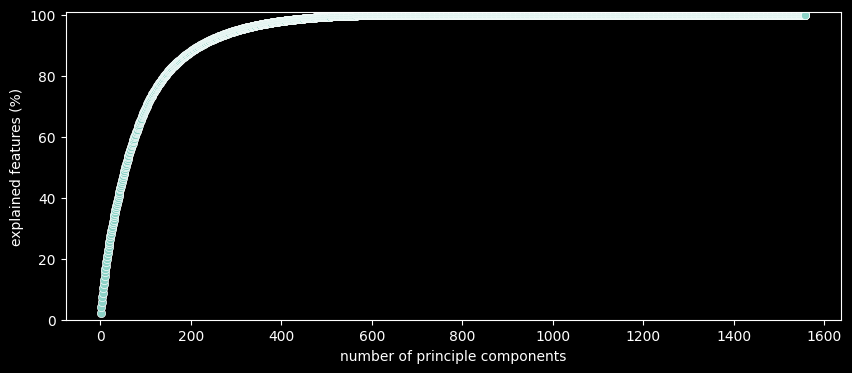

In [42]:
# ▶ 200개 PC까지 사용했을 때, 80%정도 분산을 설명할 수 있음
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use(['dark_background'])

fig, ax = plt.subplots(figsize = (10,4))
xi = np.arange(1, reduced.shape[1]+1, step=1)
y = np.cumsum(pca.explained_variance_ratio_)*100

plt.ylim(0.0,101)
plt.xlabel('number of principle components')
plt.ylabel('explained features (%)')
sns.scatterplot(x = xi, y = y)

### · 차원축소 Data set 생성
---

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use(['dark_background'])

# ▶ 200개의 주성분 수행
pca = PCA(n_components=400)
pc = pca.fit_transform(X)
pc_df=pd.DataFrame(pc).reset_index(drop=True)
pc_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399
0,-0.558073,-0.716460,-0.318646,-0.205151,-0.167924,-0.037631,0.136687,0.458809,-1.638302,0.503559,-0.339339,-0.313438,-0.373621,-0.222010,-0.183230,0.238381,-1.008948,-0.499655,-0.257897,0.084674,-0.405169,-0.416437,0.048338,0.049027,0.446290,-0.458583,0.034096,-0.178388,0.087988,0.097382,-0.034083,0.156061,-0.556665,0.143570,-0.209790,0.009819,-0.472960,-0.032815,-0.155382,-0.202298,-0.043739,0.493903,-0.319840,0.030700,0.284658,0.134525,-0.631336,-0.651760,-0.099501,0.009949,...,0.145027,-0.201386,0.568500,0.142795,0.069762,-0.323922,0.411957,-0.795286,-0.224509,0.183945,-0.978006,-0.362113,0.566442,0.363497,-0.165039,-0.976233,0.204510,0.222329,-0.035640,0.436291,0.039919,0.324120,-0.375480,0.335651,0.217156,-0.198892,-0.569397,0.883690,0.549784,1.230971,-1.003550,1.204609,0.298267,-0.261897,0.189917,-0.296104,0.514021,-0.287569,-1.034085,0.014248,0.500397,-0.158416,0.798651,0.027826,-0.210640,0.326123,0.399284,-1.015391,0.431317,0.076631
1,0.839736,2.780655,45.142385,-3.666786,-0.072672,0.504779,-0.124755,-0.944295,1.803643,0.223604,0.283282,0.022416,0.196558,-0.103382,0.080243,-0.094762,0.429636,0.283696,0.017117,0.065978,0.052612,0.106158,-0.074138,0.014394,0.381447,0.004465,-0.103392,-0.305270,0.823593,-0.309001,0.426315,0.173489,0.275581,0.028116,-1.058713,3.503066,-3.636442,42.972966,12.041876,-6.543542,-0.530801,1.432913,1.155582,1.101463,2.441681,0.166109,1.005005,1.449720,-0.980703,0.098810,...,-0.485279,-1.922607,0.118284,-0.311397,1.351356,-1.383916,0.292302,1.301778,-0.849440,1.868765,0.547653,-0.060966,-0.745375,0.747352,0.655297,-1.636136,-2.506833,0.141629,-0.702571,0.114051,-0.106325,0.677691,1.432800,-1.206795,-0.749845,-0.967919,0.301793,1.886398,0.986166,0.233304,0.577241,1.213888,-0.646476,-0.873323,1.783841,-0.994362,-0.418925,-0.173887,-0.749542,0.338686,-0.000814,-0.522395,-0.240935,-0.906147,0.400186,-0.921417,-0.609738,0.292509,-0.537288,-0.619818
2,-0.582238,-0.819797,-0.368414,-0.195936,0.379765,-0.029070,0.191940,0.620065,-1.991022,0.629783,-0.464658,-0.206467,-0.225963,-0.230226,5.313308,-0.643148,0.973630,0.015212,0.013370,-0.140216,-0.163417,0.133859,-0.029279,0.074066,0.088955,-0.013143,0.095572,-0.148791,0.015284,0.062556,0.004596,0.201348,-0.481743,0.251992,-0.241935,-0.059923,-0.201972,-0.008355,-0.155226,-0.095932,0.011816,0.107699,-0.242459,0.036673,-0.106046,0.013388,-0.036591,-0.344931,0.313654,0.046232,...,0.151386,0.258930,-0.037267,0.138314,-0.076913,0.014188,-0.127050,-0.024954,0.088837,-0.153128,0.003537,-0.006360,0.217435,-0.097487,-0.220207,0.060726,-0.041114,0.040956,0.037694,-0.020672,0.082099,-0.261191,-0.107541,-0.091711,-0.039552,-0.115274,-0.113775,-0.013813,0.126044,0.206705,0.008742,-0.028565,0.025962,0.104321,0.143159,-0.115469,0.034880,0.176306,0.040601,-0.405055,0.038307,0.016635,0.069769,0.207155,-0.396454,-0.158769,-0.348780,-0.279629,-0.200091,-0.039826
3,-0.593084,-0.653150,-0.184986,-0.225468,-0.194809,-0.040701,0.106365,0.357339,-1.239176,0.480431,-0.230315,-0.418809,0.763574,0.085282,0.026716,0.261058,-0.920688,0.290526,-0.079552,-0.216978,-0.413125,0.369143,-0.184963,0.085153,0.011534,-0.060549,0.094562,-0.196672,-0.044675,-0.035375,0.088483,0.198087,-0.544191,0.382438,-0.343733,-0.128639,-0.197241,0.091510,-0.118384,-0.231363,0.081301,0.139160,-0.270052,0.094862,-0.185284,0.120470,-0.056913,-0.566416,0.465506,-0.183638,...,-0.556888,-0.197524,0.244411,0.617759,-0.422634,-0.396940,-0.451315,-0.088783,0.538069,-0.228410,-0.292298,0.328520,0.097268,0.130955,0.272435,0.302154,-0.154582,-0.282368,-0.385299,-0.042708,0.079763,0.282865,0.078623,0.116674,-0.011247,0.023526,0.291053,-0.195701,0.074629,-0.310429,-0.096446,0.27584

### · MD 모델 생성 및 학습 
---

In [47]:
import pandas as pd
import numpy as np

# ▶ 정규 분포를 이용하여 데이터 분포에 타원을 그림, 타원에서 벗어날수록 outlier
from sklearn.covariance import EllipticEnvelope

# ▶ EllipticEnvelope 을 이용하여 outlier를 검출하기 위한 객체를 생성합니다.
# ▶ The amount of contamination of the data set, i.e. the proportion of outliers in the data set
outlier_detector = EllipticEnvelope(contamination=.10)

# ▶ EllipticEnvelope 객체를 생성한 데이터 학습
outlier_detector.fit(pc_df)

# ▶ outlier를 검출
# ▶ +1 이면 boundary 안에 들어온 값으로 정상 데이터
# ▶ -1 이면 outlier로 간주.
pred = outlier_detector.predict(pc_df)
pred

c:\Users\JunYeong.DESKTOP-IOMT4HU\anaconda3\envs\pytorch_test\lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-7077.928693574604040 > -7078.272459782122496). You may want to try with a higher value of support_fraction (current value: 0.616).
  warnings.warn(
c:\Users\JunYeong.DESKTOP-IOMT4HU\anaconda3\envs\pytorch_test\lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-7052.489312327278640 > -7053.277695259041138). You may want to try with a higher value of support_fraction (current value: 0.616).
  warnings.warn(
c:\Users\JunYeong.DESKTOP-IOMT4HU\anaconda3\envs\pytorch_test\lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-7355.774005835542994 > -7362.119

array([ 1, -1,  1, ...,  1,  1,  1])

In [49]:
# ▶ 평가를 위해 다시 라벨링
y_pred = np.where(pred==-1, 1, 0)

# ▶ 성능평가
from sklearn.metrics import classification_report
print(classification_report(Y, y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.92      0.93      1620
         1.0       0.27      0.34      0.30       143

    accuracy                           0.87      1763
   macro avg       0.61      0.63      0.62      1763
weighted avg       0.89      0.87      0.88      1763



### · Scoring 기반 Threshold 조정
---

In [50]:
# ▶ distance 추출
outlier_detector.dist_

array([2.72757535e+02, 1.91945291e+06, 1.32571809e+02, ...,
       4.66309427e+02, 2.77492721e+02, 9.13608829e+02])

C:\Users\JunYeong.DESKTOP-IOMT4HU\AppData\Local\Temp\ipykernel_14900\2998469594.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(outlier_detector.dist_, label='distribution');


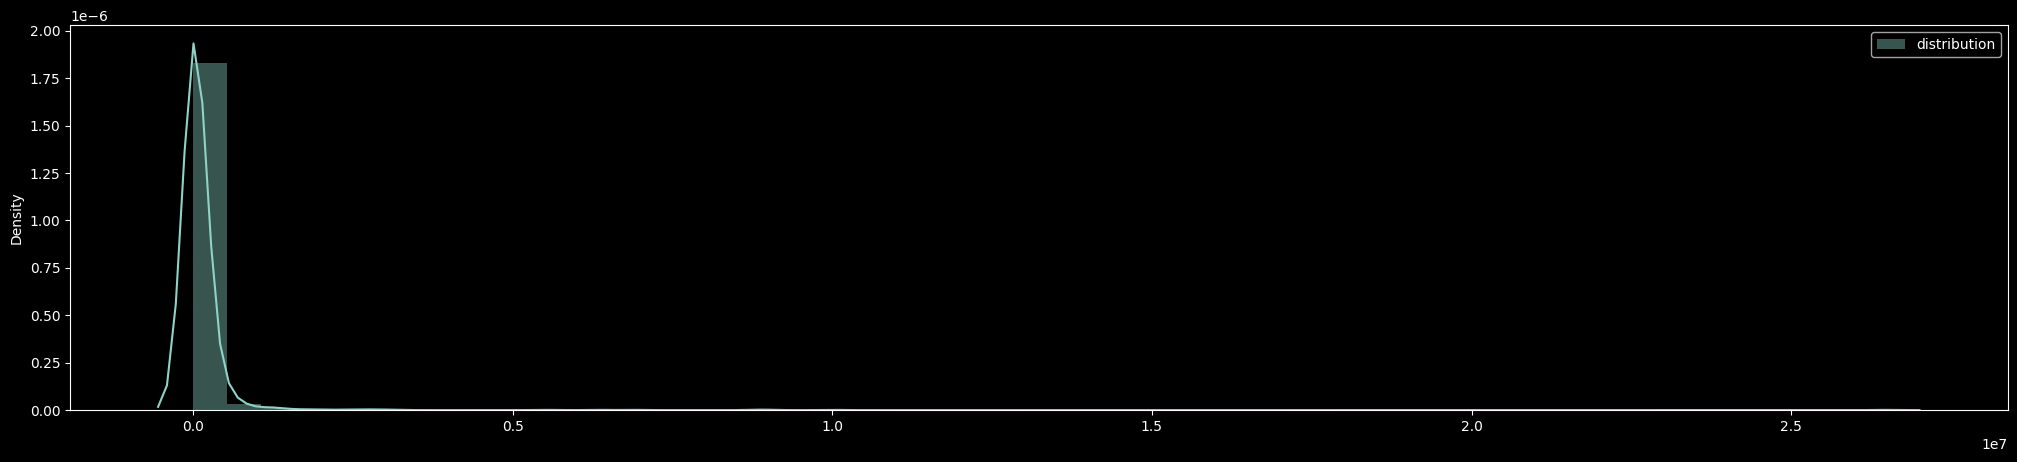

In [51]:
# ▶ 분포 시각화를 통해 Threshold 조정 
fig, ax = plt.subplots(figsize = (25,5))
sns.distplot(outlier_detector.dist_, label='distribution');
plt.legend();

In [62]:
# ▶ Score 변수 할당
y_pred_re = np.where(outlier_detector.dist_ > 0.5*pow(10,7), 1, 0)

In [63]:
# ▶ 성능평가
from sklearn.metrics import classification_report
print(classification_report(Y, y_pred_re))

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96      1620
         1.0       0.86      0.04      0.08       143

    accuracy                           0.92      1763
   macro avg       0.89      0.52      0.52      1763
weighted avg       0.92      0.92      0.89      1763



In [64]:
pd.Series(y_pred_re).value_counts()

0    1756
1       7
Name: count, dtype: int64

### · Feature Selection을 진행한 후의 성능
---

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use(['dark_background'])

X = df_raw[['feature_2', 'feature_3', 'feature_1', 'feature_4', 'feature_188']]
Y = df_raw['Class']
# ▶ 200개의 주성분 수행
pca = PCA(n_components=4)
pc = pca.fit_transform(X)
pc_df=pd.DataFrame(pc).reset_index(drop=True)
pc_df.head()

,0,1,2,3
0,0.013933,1.770088,-0.693714,0.593065
1,-0.241197,-1.570602,0.460870,0.767590
2,0.099566,0.722425,0.868386,-0.618168
3,-0.999045,-0.132343,-0.691746,2.090042
4,2.707778,-1.493807,-1.343391,-1.241668


In [69]:
# ▶ pca.n_components_(차원 축소 주성분 개수)
features = range(pca.n_components_)
feature_df=pd.DataFrame(data=features,columns=['pc_feature'])

# ▶ pca.explained_variance_ratio_(설명력)
variance_df=pd.DataFrame(data=pca.explained_variance_ratio_,columns=['variance'])
pc_feature_df=pd.concat([feature_df,variance_df],axis=1)
pc_feature_df

,pc_feature,variance
0,0,0.309242
1,1,0.299162
2,2,0.179048
3,3,0.161089


In [71]:
import pandas as pd
import numpy as np

# ▶ 정규 분포를 이용하여 데이터 분포에 타원을 그림, 타원에서 벗어날수록 outlier
from sklearn.covariance import EllipticEnvelope

# ▶ EllipticEnvelope 을 이용하여 outlier를 검출하기 위한 객체를 생성합니다.
# ▶ The amount of contamination of the data set, i.e. the proportion of outliers in the data set
outlier_detector = EllipticEnvelope(contamination=.10)

# ▶ EllipticEnvelope 객체를 생성한 데이터 학습
outlier_detector.fit(pc_df)

# ▶ outlier를 검출
# ▶ +1 이면 boundary 안에 들어온 값으로 정상 데이터
# ▶ -1 이면 outlier로 간주.
pred = outlier_detector.predict(pc_df)

# ▶ 평가를 위해 다시 라벨링
y_pred = np.where(pred==-1, 1, 0)

# ▶ 성능평가
from sklearn.metrics import classification_report
print(classification_report(Y, y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92      1620
         1.0       0.04      0.04      0.04       143

    accuracy                           0.84      1763
   macro avg       0.48      0.48      0.48      1763
weighted avg       0.84      0.84      0.84      1763



C:\Users\JunYeong.DESKTOP-IOMT4HU\AppData\Local\Temp\ipykernel_14900\2998469594.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(outlier_detector.dist_, label='distribution');


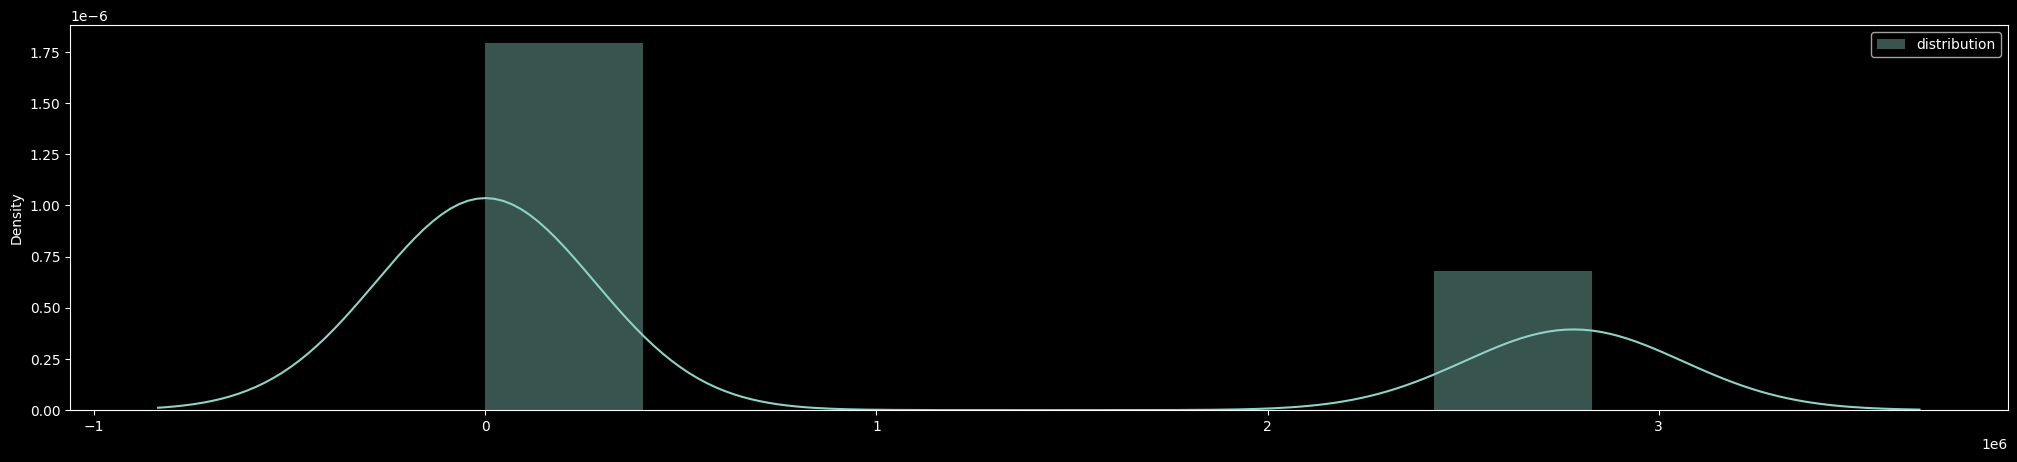

In [72]:
# ▶ 분포 시각화를 통해 Threshold 조정 
fig, ax = plt.subplots(figsize = (25,5))
sns.distplot(outlier_detector.dist_, label='distribution');
plt.legend();

In [81]:
# ▶ Score 변수 할당
y_pred_re = np.where(outlier_detector.dist_ > 1*pow(10,6), 1, 0)

# ▶ 성능평가
from sklearn.metrics import classification_report
print(classification_report(Y, y_pred_re))

              precision    recall  f1-score   support

         0.0       0.92      0.72      0.81      1620
         1.0       0.07      0.24      0.11       143

    accuracy                           0.68      1763
   macro avg       0.49      0.48      0.46      1763
weighted avg       0.85      0.68      0.75      1763



In [79]:
pd.Series(y_pred_re).value_counts()

0    1277
1     486
Name: count, dtype: int64

#### 일단 모든 변수로 모델을 돌려본 후 성능이 저조하면 그 때 Feature Selection을 진행하는게 좋음